<a href="https://colab.research.google.com/github/kaveripriyap/devanagari-character-classifier-fastai/blob/master/Devanagari_Classifier_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Devanagari Classifier with fastai**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### **Importing fastai** 

In [ ]:
from fastai import *
from fastai.vision import *

### **Mounting Drive**

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
ls: cannot access '/content/drive/Datasets/DevanagariHandwrittenCharacterDataset': No such file or directory


In [ ]:
path = 'drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset'
!ls "/content/drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset"

Test  Train


### **Creating an ImageDataBunch**

/usr/local/lib/python3.6/dist-packages/fastai/vision/data.py:306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


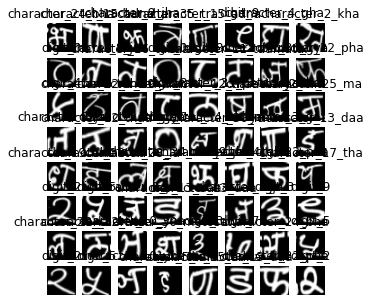

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path=path, train='Train', test='Test', valid_pct=0.2, ds_tfms=tfms)
data.show_batch(rows=8, figsize=(5,5))

In [ ]:
data

ImageDataBunch;

Train: LabelList (62568 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Valid: LabelList (15642 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_20_na,character_7_chha,digit_8,character_9_jha,character_36_gya
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Test: LabelList (13800 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset

### **ResNet34**

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,2.414613,1.726540,0.477433,3:15:13
1,1.376728,0.885466,0.261476,03:15
2,0.793329,0.444204,0.131761,03:01
3,0.568515,0.320357,0.098453,02:56
4,0.479242,0.231482,0.070579,02:54
5,0.403704,0.207679,0.064122,02:51
6,0.393403,0.203320,0.062716,02:51


In [ ]:
learn.save('stage-1-resnet34')

### **Fine-tuning**

In [ ]:
learn.load('stage-1-resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (62568 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Valid: LabelList (15642 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_20_na,character_7_chha,digit_8,character_9_jha,character_36_gya
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Test: LabelList (13800 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


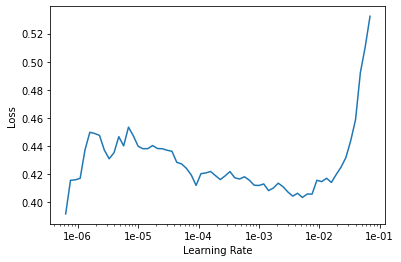

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-04, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.337121,0.214396,0.058816,03:00
1,0.123446,0.061920,0.017325,03:02
2,0.057500,0.032462,0.009398,03:03


In [ ]:
learn.save('stage-2-resnet34')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-04, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.135082,0.066252,0.017581,02:55
1,0.047415,0.030289,0.008631,02:58


In [ ]:
learn.save('stage-3-resnet34')

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.241935,0.176692,0.051784,02:57
1,0.063116,0.035550,0.010549,02:59


In [ ]:
learn.load('stage-3-resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (62568 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Valid: LabelList (15642 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_20_na,character_7_chha,digit_8,character_9_jha,character_36_gya
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Test: LabelList (13800 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.272907,0.158026,0.044751,02:57
1,0.061844,0.086870,0.016174,02:56


In [ ]:
learn.load('stage-2-resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (62568 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Valid: LabelList (15642 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_20_na,character_7_chha,digit_8,character_9_jha,character_36_gya
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Test: LabelList (13800 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-05, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.108853,0.046261,0.011252,02:56
1,0.067139,0.035191,0.008567,02:58
2,0.034792,0.029864,0.007608,02:57


In [ ]:
learn.save('stage-4-resnet34')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-05, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.044573,0.031487,0.007863,02:57


In [ ]:
learn.load('stage-4-resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (62568 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Valid: LabelList (15642 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_20_na,character_7_chha,digit_8,character_9_jha,character_36_gya
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset;

Test: LabelList (13800 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: drive/My Drive/Datasets/DevanagariHandwrittenCharacterDataset, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.245930,0.131981,0.037208,02:56
1,0.059258,0.036655,0.010932,02:58


### **Results - Resnet34**

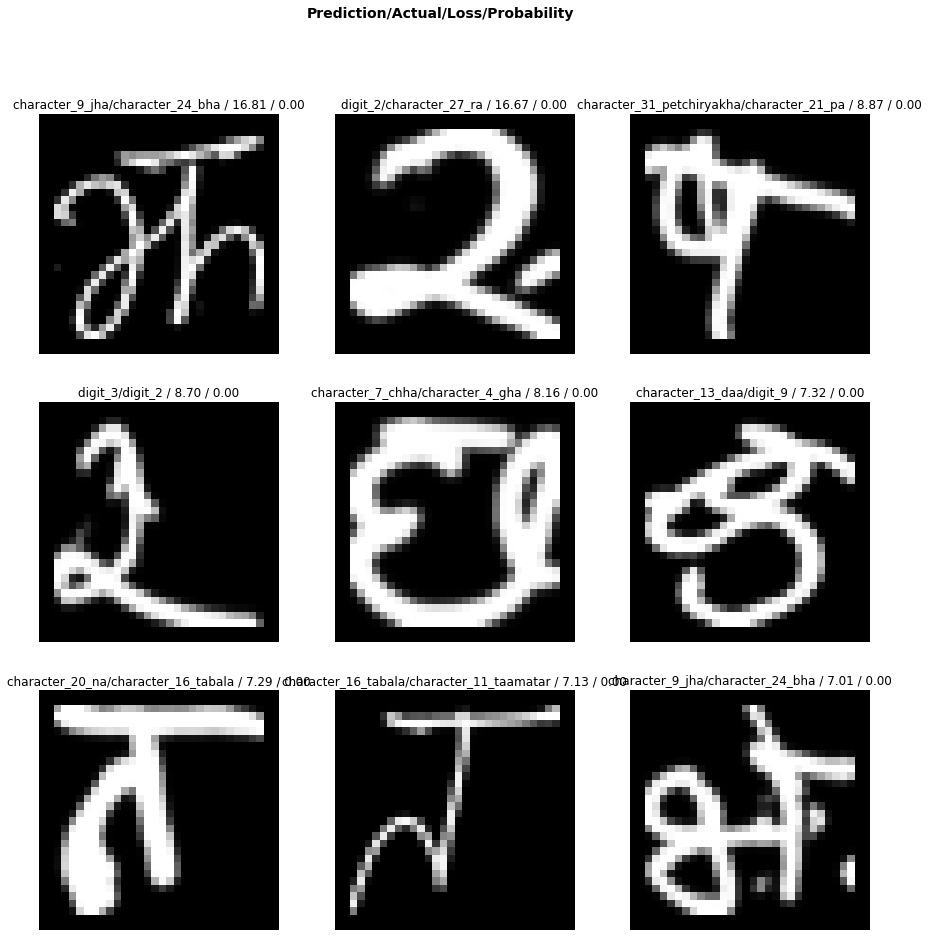

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,15))

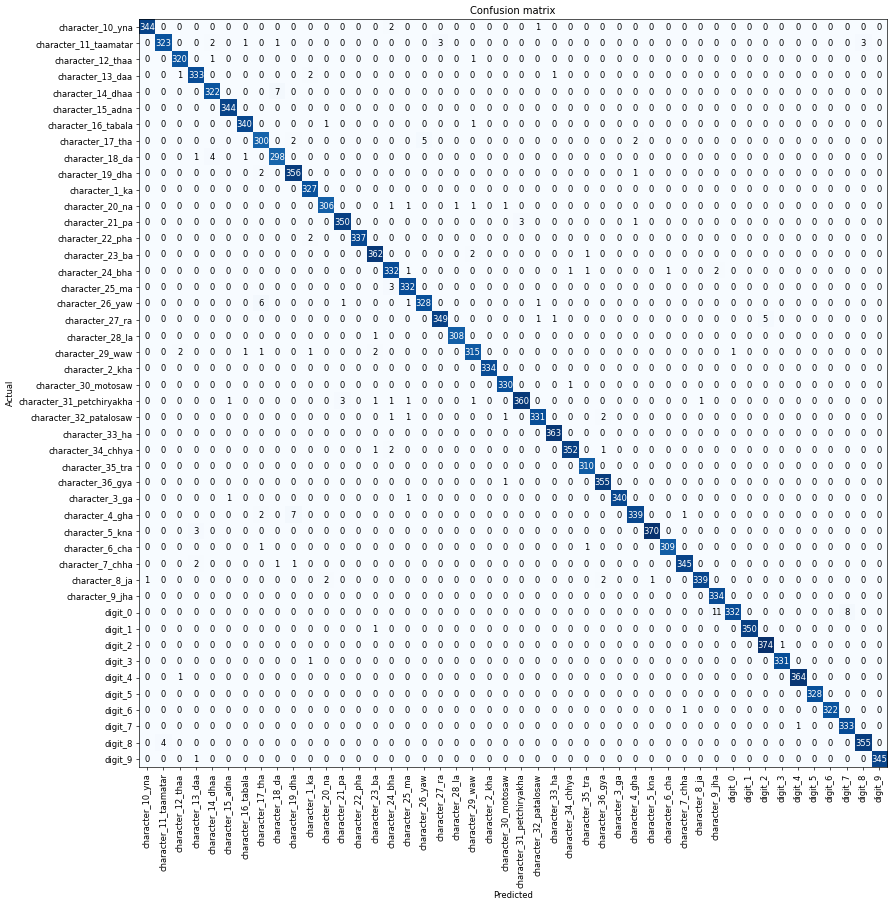

In [ ]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

### **ResNet50**

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save('stage-1-resnet50')

### **Fine-tuning**

In [ ]:
learn.load('stage-1-resnet50')

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-05, 1e-02))

In [ ]:
learn.load('stage-1-resnet50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(7, max_lr=slice(1e-05, 1e-02))

In [ ]:
learn.save('stage-2-resnet50')

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-05, 1e-03))

In [ ]:
learn.save('stage-3-resnet50')

In [ ]:
learn.load('stage-3-resnet50')

### **Results - Resnet50**

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,15))

In [ ]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)